# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
%matplotlib inline
import nltk
import re
import warnings

In [45]:
train_df= pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Twitter-Sentiment-Analysis/master/train_tweet.csv")
test_df= pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Twitter-Sentiment-Analysis/master/train_tweet.csv")

In [3]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train_df.isnull().any()
test_df.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [6]:
# checking out the negative comments from the train set
train_df[train_df["label"]== 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
# checking out the postive comments from the train set 
train_df[train_df["label"]== 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


<AxesSubplot:>

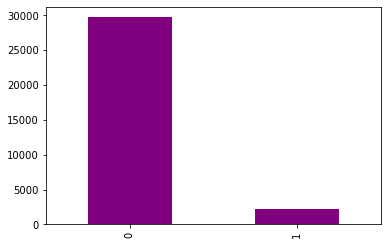

In [49]:
train_df["label"].value_counts().plot.bar(color= "purple", figsize= (6, 4))

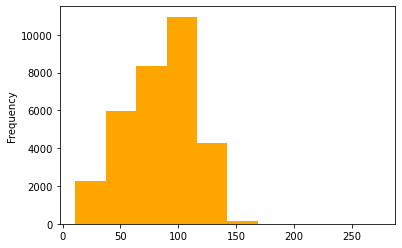

In [50]:
# checking the distribution of tweets in the data

length_train = train_df['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test_df['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [52]:
# adding a column to represent the length of the tweet
train_df["len"]= train_df["tweet"].str.len()
test_df["len"]= test_df["tweet"].str.len()

In [53]:
train_df.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [54]:
train_df.groupby("label").describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

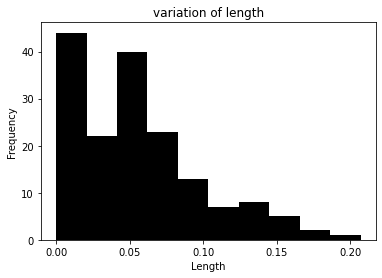

In [55]:
train_df.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

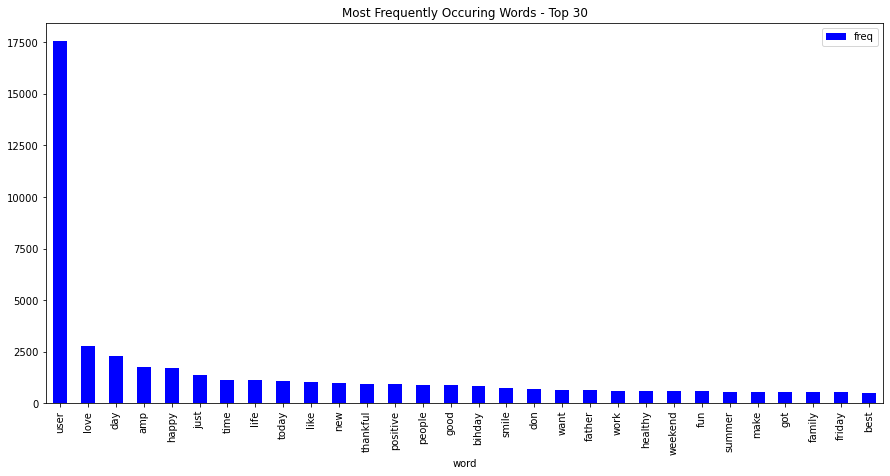

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(stop_words= "english")
words= cv.fit_transform(train_df.tweet)
sum_words= words.sum(axis= 0)

words_freq= [(word,sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse= True)
frequency= pd.DataFrame(words_freq, columns= ["word", "freq"])

frequency.head(30).plot(x= "word", y="freq", kind="bar", figsize= (15,7), color="b")
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

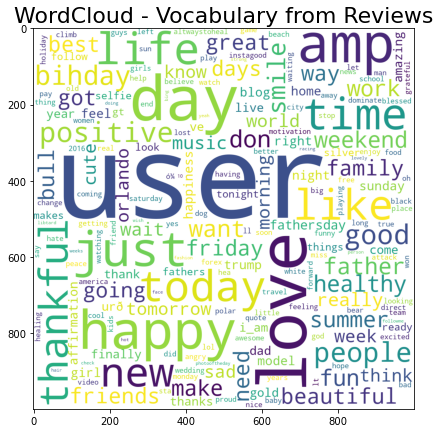

In [16]:
from wordcloud import WordCloud
wordcloud= WordCloud(background_color= "white",
                    width= 1000,
                    height= 1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
plt.show()

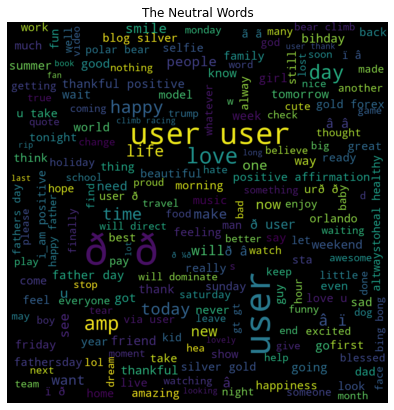

In [17]:
normal_words= " ".join([text for text in train_df["tweet"][train_df["label"]== 0]])

wordcloud= WordCloud(random_state= 0,
                     background_color= "black",
                    height= 1000,
                    width= 1000,
                    max_font_size= 110).generate(normal_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.title("The Neutral Words")
plt.show()

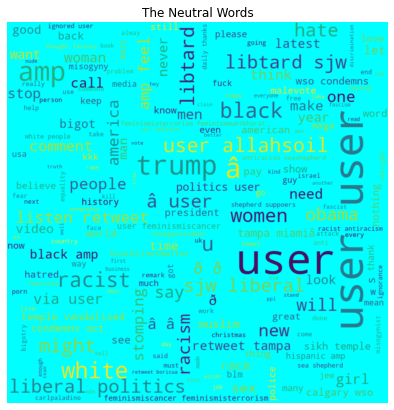

In [18]:
normal_words= " ".join([text for text in train_df["tweet"][train_df["label"]== 1]])

wordcloud= WordCloud(random_state= 0,
                     background_color= "cyan",
                    height= 1000,
                    width= 1000,
                    max_font_size= 110).generate(normal_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.title("The Neutral Words")
plt.show()

In [19]:
#Collecting the hashtags
def hashtag_extract(x):
    hashtags= []
    for i in x:
        ht= re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [20]:
# extracting hashtags from non racist/sexist tweets
HT_regular= hashtag_extract(train_df["tweet"][train_df["label"]==0])

# extracting hashtags from racist/sexist tweets
HT_negative= hashtag_extract(train_df["tweet"][train_df["label"]==1])

# unnesting list
HT_regular= sum(HT_regular, [])
HT_negative= sum(HT_negative, [])

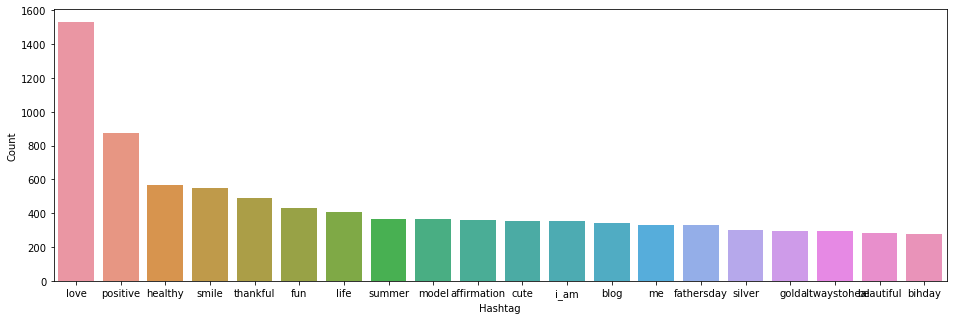

In [56]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

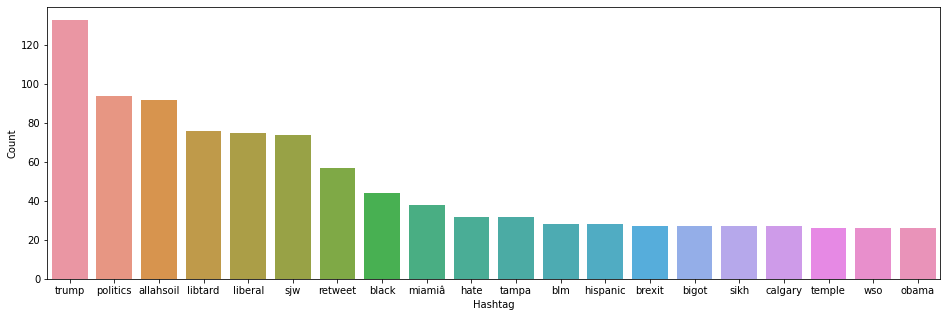

In [57]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
# tokenizing the words present in the training set
tokenized_tweet= train_df["tweet"].apply(lambda x: x.split())
# importing gensim
import gensim
# creating a word to vector model
model_w2v= gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size= 200, # desired no. of features/independent variables 
            window= 5, # context window size
            min_count= 2,
            sg= 1, # 1 for skip-gram model
            hs= 0,
            negative= 10, # for negative sampling
            workers= 2, # no.of cores
            seed= 34
)
model_w2v.train(tokenized_tweet, total_examples= len(train_df["tweet"]), epochs= 20)

(6110037, 8411580)

In [24]:
print(tokenized_tweet)

0        [@user, when, a, father, is, dysfunctional, an...
1        [@user, @user, thanks, for, #lyft, credit, i, ...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                 [factsguide:, society, now, #motivation]
                               ...                        
31957    [ate, @user, isz, that, youuu?ðððð...
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [@user, #sikh, #temple, vandalised, in, in, #c...
31961                [thank, you, @user, for, you, follow]
Name: tweet, Length: 31962, dtype: object


In [25]:
model_w2v.wv.most_similar(positive= "dinner")

[('spaghetti', 0.6441134214401245),
 ('#prosecco', 0.5950039029121399),
 ('#wanderlust', 0.5926905274391174),
 ('bay.', 0.587561845779419),
 ('7!', 0.5867902636528015),
 ('podium', 0.5828898549079895),
 ('sister!!', 0.5819474458694458),
 ('dialogue', 0.580797553062439),
 ('#burgers', 0.5740026235580444),
 ('enroute', 0.5729241371154785)]

In [26]:
model_w2v.wv.most_similar(positive="cancer")

[('law.', 0.710568904876709),
 ("society's", 0.6991099715232849),
 ('ownership', 0.697458028793335),
 ('harassment', 0.6971838474273682),
 ('behavior.', 0.6958668231964111),
 ('level.', 0.6946729421615601),
 ('speeches', 0.6940805912017822),
 ('champion,', 0.6928701996803284),
 ('solution', 0.6918444633483887),
 ('answer.', 0.6899546980857849)]

In [27]:
model_w2v.wv.most_similar(positive= "apple")

[('"mytraining"', 0.7006378173828125),
 ('mytraining', 0.6996554136276245),
 ('training"', 0.6819640398025513),
 ('app,', 0.6553484201431274),
 ('"my', 0.5921729803085327),
 ('app', 0.5877823233604431),
 ('humans.', 0.5766454935073853),
 ('ta', 0.5752402544021606),
 ('ios', 0.5591431260108948),
 ('heroku', 0.5570899844169617)]

In [28]:
model_w2v.wv.most_similar(negative= "hate")

[('#foodie', 0.02876180037856102),
 ('#enjoy', 0.026280444115400314),
 ('#tgif', 0.025633487850427628),
 ('de', 0.019788995385169983),
 ('#staup', 0.01434878446161747),
 ('ð\x9f\x8d»', 0.01231656689196825),
 ('spain', 0.006019874941557646),
 ('â\x9c\x88ï¸\x8f', 0.005532420706003904),
 ('/', 0.004620073363184929),
 ('street,', 0.002099259989336133)]

In [29]:
from tqdm import tqdm
tqdm.pandas(desc= "progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [30]:
def add_label(twt):
    output= []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output
# label all the tweets
labeled_tweets= add_label(tokenized_tweet)
labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [31]:
# removing unwanted patterns from the data
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
train_corpus= []

for i in range(0, 31962):
    review= re.sub("[^a-zA-Z]", " ", train_df["tweet"][i])
    review= review.lower()
    review= review.split()
    
    ps= PorterStemmer()
    
    #stemming
    review= [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    
    #joining them back with space
    review= " ".join(review)
    train_corpus.append(review)

In [33]:
test_corpus= []
for i in range(0, 17197):
    review= re.sub("[^a-zA-Z]", " ",test_df["tweet"][i])
    review= review.lower()
    review= review.split()
    
    ps= PorterStemmer()
    
    #stemming
    review= [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    
    #Joining them back with space
    review= " ".join(review)
    test_corpus.append(review)

In [34]:
#Create a bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features= 2500)
x= cv.fit_transform(train_corpus).toarray()
y= train_df.iloc[:,-1] #taking all the rows and only the last column

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [35]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features= 2500)
x_test= cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [36]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid= train_test_split(x, y, test_size= 0.25, random_state= 42)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [37]:
# standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_valid= sc.transform(x_valid)
x_test= sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred), average = 'micro')

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_valid)

print("Training accuracy: ",model.score(x_train, y_train))
print("Validation accuracy: ",model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score: ",f1_score(y_valid, y_pred), average = ['micro'])

# confusion matrix
cm= confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.svm import SVC

model= SVC()
model.fit(x_train, y_train)
print("Training accuracy: ",model.score(x_train, y_train))
print("Validation accuracy: ",model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score: ",f1_score(y_valid, y_pred), average = ['micro'])

# confusion matrix
cm= confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train, y_train)
print("Training accuracy: ",model.score(x_train, y_train))
print("Validation accuracy: ",model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score: ",f1_score(y_valid, y_pred), average = ['micro'])

# confusion matrix
cm= confusion_matrix(y_valid, y_pred)
print(cm)